In [1]:
import numpy as np

In [2]:
import torch

In [3]:
from __future__ import print_function
import argparse
import numpy  as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import transforms

In [4]:
import data_loaders

In [5]:
from data_loaders import Plain_Dataset, eval_data_dataloader

In [6]:
from SQ_EX_Att import SECNN

In [7]:
device1 = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [8]:
device2 = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [9]:
device3 = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [10]:
input_shape = (3, 48, 48)
model1 = SECNN(input_shape,num_classes=8)

In [11]:
input_shape = (3, 48, 48)
model2 = SECNN(input_shape,num_classes=8)

In [12]:
input_shape = (3, 48, 48)
model3 = SECNN(input_shape,num_classes=8)

In [13]:
model1.load_state_dict(torch.load("SQEX_weights"))
model2.load_state_dict(torch.load("SQEX_weights2"))
model3.load_state_dict(torch.load("SQEX_weights3"))


<All keys matched successfully>

In [14]:
model1.to(device1)

SECNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.1, inplace=False)
  (se1): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.1, inplace=False)
  (se2): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout3): Dropout(p=0.1, inplace=False)
  (se3): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=16, out_featur

In [15]:
model2.to(device2)

SECNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.1, inplace=False)
  (se1): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.1, inplace=False)
  (se2): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout3): Dropout(p=0.1, inplace=False)
  (se3): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=16, out_featur

In [16]:
model3.to(device3)

SECNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout1): Dropout(p=0.1, inplace=False)
  (se1): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout2): Dropout(p=0.1, inplace=False)
  (se2): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=8, out_features=1, bias=True)
    (relu): ReLU(inplace=True)
    (fc2): Linear(in_features=1, out_features=8, bias=True)
    (sigmoid): Sigmoid()
  )
  (conv3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (dropout3): Dropout(p=0.1, inplace=False)
  (se3): SqueezeExciteBlock(
    (squeeze): AdaptiveAvgPool2d(output_size=1)
    (fc1): Linear(in_features=16, out_featur

In [17]:
transformation= transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [18]:
test_dataset= Plain_Dataset(csv_file="data2/test.csv", img_dir = "data2/test/", datatype = 'test', transform = transformation)
test_loader=   DataLoader(test_dataset,batch_size=64,shuffle = True,num_workers=0)

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

y_pred1 = []
y_pred2= []
y_pred3 = []
y_true = []
for inputs, labels in test_loader:
        inputs, labels = inputs.to(device1), labels.to(device1)

        output1 = model1(inputs) # Feed Network

        output1 = (torch.max(torch.exp(output1), 1)[1]).data.cpu().numpy()
        y_pred1.extend(output1) # Save Prediction
        
        output2 = model2(inputs) # Feed Network

        output2 = (torch.max(torch.exp(output2), 1)[1]).data.cpu().numpy()
        y_pred2.extend(output2) # Save Prediction
        
        output3 = model3(inputs) # Feed Network

        output3 = (torch.max(torch.exp(output3), 1)[1]).data.cpu().numpy()
        y_pred3.extend(output3) # Save Prediction
        
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

In [20]:
y_pred1

[6,
 4,
 0,
 5,
 5,
 4,
 5,
 7,
 5,
 5,
 5,
 3,
 1,
 4,
 0,
 4,
 6,
 4,
 6,
 6,
 4,
 5,
 5,
 5,
 2,
 5,
 7,
 5,
 4,
 4,
 0,
 4,
 0,
 3,
 5,
 5,
 0,
 5,
 6,
 5,
 2,
 5,
 5,
 4,
 4,
 7,
 4,
 4,
 5,
 7,
 6,
 4,
 6,
 0,
 0,
 4,
 5,
 6,
 5,
 2,
 5,
 5,
 4,
 4,
 5,
 7,
 0,
 7,
 2,
 5,
 5,
 0,
 0,
 5,
 4,
 0,
 6,
 5,
 5,
 5,
 2,
 5,
 3,
 5,
 5,
 5,
 0,
 5,
 4,
 1,
 4,
 7,
 7,
 0,
 7,
 5,
 4,
 0,
 6,
 5,
 5,
 7,
 7,
 4,
 5,
 4,
 2,
 5,
 4,
 5,
 5,
 1,
 4,
 5,
 5,
 6,
 6,
 4,
 4,
 5,
 0,
 5,
 7,
 5,
 2,
 5,
 4,
 7,
 6,
 0,
 5,
 5,
 4,
 4,
 5,
 0,
 4,
 5,
 5,
 5,
 4,
 0,
 5,
 0,
 5,
 5,
 5,
 6,
 7,
 5,
 6,
 0,
 6,
 5,
 2,
 4,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 7,
 4,
 0,
 3,
 0,
 7,
 5,
 4,
 5,
 0,
 4,
 0,
 5,
 5,
 3,
 2,
 4,
 7,
 6,
 5,
 7,
 4,
 4,
 5,
 4,
 2,
 4,
 6,
 2,
 7,
 4,
 7,
 6,
 4,
 4,
 7,
 5,
 5,
 7,
 4,
 4,
 5,
 5,
 5,
 5,
 7,
 4,
 7,
 4,
 7,
 1,
 4,
 4,
 2,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 0,
 4,
 5,
 6,
 0,
 5,
 0,
 6,
 2,
 7,
 5,
 5,
 5,
 5,
 4,
 0,
 4,
 5,
 4,
 5,
 0,
 5,
 0,
 5,
 4,
 5,


In [21]:
y_pred2

[6,
 4,
 0,
 5,
 5,
 4,
 5,
 7,
 4,
 5,
 5,
 7,
 5,
 6,
 0,
 4,
 5,
 5,
 0,
 4,
 6,
 7,
 5,
 5,
 5,
 5,
 7,
 5,
 4,
 4,
 0,
 4,
 5,
 5,
 5,
 5,
 0,
 5,
 5,
 5,
 6,
 5,
 5,
 4,
 4,
 7,
 4,
 4,
 5,
 6,
 5,
 4,
 6,
 7,
 0,
 5,
 5,
 6,
 5,
 7,
 4,
 5,
 4,
 0,
 5,
 7,
 7,
 7,
 5,
 4,
 5,
 0,
 0,
 5,
 4,
 4,
 6,
 6,
 4,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 0,
 6,
 4,
 5,
 4,
 7,
 5,
 4,
 7,
 6,
 4,
 0,
 5,
 5,
 5,
 5,
 7,
 4,
 5,
 5,
 0,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 0,
 5,
 7,
 5,
 5,
 5,
 4,
 5,
 6,
 5,
 4,
 5,
 5,
 4,
 5,
 0,
 4,
 5,
 7,
 5,
 4,
 7,
 5,
 0,
 5,
 5,
 5,
 6,
 5,
 4,
 6,
 0,
 5,
 5,
 6,
 4,
 5,
 5,
 4,
 4,
 7,
 4,
 5,
 4,
 5,
 0,
 3,
 0,
 7,
 5,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 7,
 5,
 4,
 5,
 6,
 5,
 7,
 4,
 4,
 5,
 4,
 5,
 5,
 6,
 6,
 7,
 4,
 7,
 6,
 4,
 4,
 7,
 5,
 5,
 7,
 4,
 4,
 5,
 5,
 5,
 5,
 7,
 4,
 7,
 4,
 7,
 5,
 7,
 4,
 5,
 6,
 6,
 5,
 6,
 4,
 4,
 7,
 7,
 4,
 4,
 6,
 4,
 5,
 7,
 6,
 5,
 4,
 5,
 5,
 5,
 5,
 6,
 0,
 7,
 5,
 4,
 5,
 0,
 5,
 0,
 4,
 4,
 5,


In [22]:
y_pred3

[6,
 4,
 0,
 5,
 5,
 4,
 5,
 7,
 5,
 5,
 6,
 7,
 1,
 4,
 5,
 4,
 6,
 5,
 6,
 6,
 4,
 5,
 5,
 5,
 5,
 3,
 3,
 5,
 4,
 6,
 0,
 4,
 0,
 3,
 5,
 5,
 0,
 5,
 0,
 5,
 2,
 5,
 5,
 4,
 4,
 7,
 4,
 4,
 5,
 3,
 6,
 4,
 6,
 7,
 0,
 4,
 5,
 5,
 5,
 2,
 5,
 5,
 4,
 0,
 5,
 7,
 5,
 7,
 5,
 0,
 5,
 0,
 0,
 3,
 4,
 0,
 6,
 5,
 5,
 5,
 2,
 5,
 3,
 6,
 7,
 5,
 0,
 5,
 4,
 1,
 6,
 7,
 7,
 4,
 7,
 6,
 4,
 6,
 7,
 6,
 5,
 7,
 7,
 4,
 5,
 4,
 0,
 5,
 4,
 5,
 5,
 5,
 3,
 7,
 6,
 5,
 4,
 4,
 5,
 5,
 0,
 6,
 7,
 4,
 6,
 5,
 4,
 6,
 6,
 0,
 5,
 5,
 6,
 6,
 5,
 0,
 4,
 5,
 5,
 5,
 4,
 0,
 5,
 0,
 5,
 6,
 5,
 6,
 7,
 5,
 5,
 0,
 6,
 5,
 6,
 4,
 5,
 5,
 4,
 4,
 7,
 4,
 6,
 4,
 4,
 0,
 3,
 0,
 7,
 5,
 4,
 5,
 0,
 4,
 0,
 7,
 6,
 3,
 2,
 4,
 7,
 6,
 5,
 0,
 4,
 4,
 5,
 3,
 5,
 6,
 4,
 6,
 7,
 4,
 7,
 6,
 5,
 4,
 7,
 5,
 6,
 7,
 4,
 4,
 5,
 7,
 5,
 5,
 7,
 4,
 7,
 4,
 7,
 5,
 4,
 4,
 6,
 5,
 6,
 3,
 6,
 4,
 5,
 4,
 7,
 4,
 4,
 6,
 4,
 5,
 0,
 6,
 1,
 4,
 5,
 5,
 5,
 6,
 6,
 0,
 7,
 5,
 4,
 5,
 0,
 5,
 0,
 7,
 4,
 5,


In [23]:
def vote(tally):
    """
    Perform a vote on each element of the given lists.
    In case of a tie, the value from the first list is chosen.
    
    Parameters:
    - tally: List of lists, each of the same length.
    
    Returns:
    - List containing the voted values.
    """
    result = []
    list_len = len(tally[0])

    for i in range(list_len):
        # Count occurrences of each element in the current position
        counts = {}
        for lst in tally:
            value = lst[i]
            counts[value] = counts.get(value, 0) + 1
        
        # Find the element with the maximum count
        max_count = max(counts.values())
        candidates = [key for key, count in counts.items() if count == max_count]
        
        # Choose the winner, or use the value from the first list in case of a tie
        winner = candidates[0] if len(candidates) == 1 else tally[0][i]
        result.append(winner)

    return result
result = vote([y_pred1, y_pred2, y_pred3])
print(result)

[6, 4, 0, 5, 5, 4, 5, 7, 5, 5, 5, 7, 1, 4, 0, 4, 6, 5, 6, 6, 4, 5, 5, 5, 5, 5, 7, 5, 4, 4, 0, 4, 0, 3, 5, 5, 0, 5, 6, 5, 2, 5, 5, 4, 4, 7, 4, 4, 5, 7, 6, 4, 6, 7, 0, 4, 5, 6, 5, 2, 5, 5, 4, 0, 5, 7, 0, 7, 5, 5, 5, 0, 0, 5, 4, 0, 6, 5, 5, 5, 2, 5, 3, 5, 5, 5, 0, 5, 4, 1, 4, 7, 7, 4, 7, 6, 4, 0, 6, 5, 5, 7, 7, 4, 5, 4, 0, 5, 4, 5, 5, 5, 4, 5, 5, 6, 4, 4, 5, 5, 0, 5, 7, 5, 2, 5, 4, 7, 6, 0, 5, 5, 4, 4, 5, 0, 4, 5, 5, 5, 4, 0, 5, 0, 5, 5, 5, 6, 7, 5, 6, 0, 6, 5, 6, 4, 5, 5, 4, 4, 7, 4, 5, 4, 4, 0, 3, 0, 7, 5, 4, 5, 0, 4, 0, 5, 5, 3, 2, 4, 7, 6, 5, 7, 4, 4, 5, 4, 5, 4, 6, 6, 7, 4, 7, 6, 4, 4, 7, 5, 5, 7, 4, 4, 5, 5, 5, 5, 7, 4, 7, 4, 7, 5, 4, 4, 2, 5, 6, 5, 6, 4, 4, 4, 7, 4, 4, 6, 4, 5, 0, 6, 2, 4, 5, 5, 5, 5, 6, 0, 7, 5, 4, 5, 0, 5, 0, 5, 4, 5, 5, 5, 0, 5, 7, 5, 0, 5, 5, 5, 5, 5, 0, 5, 0, 4, 6, 0, 7, 0, 0, 0, 5, 5, 7, 1, 0, 7, 4, 1, 7, 7, 7, 0, 0, 7, 7, 4, 5, 7, 4, 5, 5, 0, 5, 0, 5, 4, 4, 5, 5, 6, 5, 5, 7, 5, 6, 4, 6, 0, 7, 5, 2, 6, 7, 0, 7, 3, 5, 4, 4, 5, 5, 0, 4, 6, 7, 5, 5, 4, 6, 0, 4, 

In [24]:
len(result)

7099

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, result)

0.6412170728271588

In [26]:
classes = ('Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness',
        'Neutral', 'Sadness', 'Surprise')

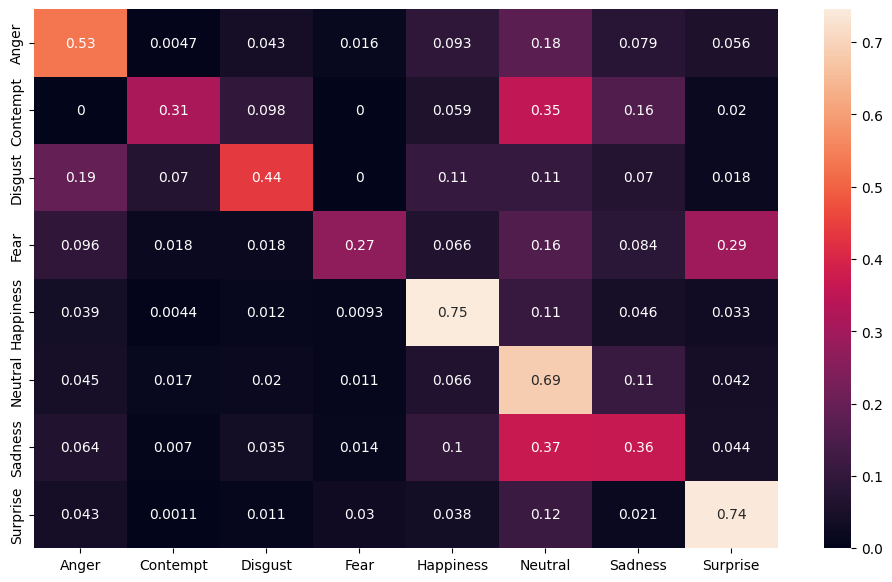

In [27]:
import matplotlib.pyplot as plt
cf_matrix = confusion_matrix(y_true, result)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)
plt.savefig('output.png')

In [28]:
from sklearn.metrics import precision_score, recall_score

In [29]:
print(precision_score(y_true, result, average = "micro"))

0.6412170728271588


In [30]:
print(precision_score(y_true, result, average = "macro"))

0.46848902391201797


In [31]:
print(recall_score(y_true, result, average = "micro"))

0.6412170728271588


In [32]:
print(recall_score(y_true, result, average = "macro"))

0.5113654442381872
